In [5]:
# uncomment the line to install hdbscan and you are in a conda environment
#!conda install -c conda-forge hdbscan
# uncomment the line to install hdbscan and you are in a pip environment
#!pip install -c conda-forge hdbscan

import sklearn.cluster as cluster
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import NearestNeighbors

def plot_it(data,labels,title):    
    # generate a color palette
    colors = sns.color_palette(None, max(labels)+1)
    # plot the samples
    plt.figure(figsize=(8,6))
    plt.title(title)
    # data
    plt.scatter(
            data[:,0], data[:,1],
            s=30,
            color='white',
            marker='o', 
            edgecolor='gray',
            alpha=0.5,
            label='data/noise')
    if len(labels) == len(data):        
        # clusters
        for c in range(0,max(labels)+1):
            plt.scatter(
                data[labels == c, 0], data[labels == c, 1],
                s=50,
                color=colors[c],
                marker='s', 
                edgecolor='black',
                label='cluster ' + str(c)
            )        
    plt.legend(scatterpoints=1)    

def dmdbscan(data,k=2):    
    nn = NearestNeighbors(n_neighbors=k).fit(data)  # identify the k nearest neighbors (incl. self)
    distances, indices = nn.kneighbors(data)        # return distances to the k neigbhbors (incl. self)
    print(f"shape of distances: {distances.shape} and first row is: {distances[0,:]}")

    # one plot per sorted distance to the kth-neighbor
    plt.figure(figsize=(8,6))    
    plt.yticks(np.arange(0,1.0,0.005))
    plt.plot(np.sort(distances, axis=0)[:,k-1])       # sort the list of distances to the kth neighbor (excl. self)
    plt.xlabel("samples")
    plt.ylabel("eps")
    plt.title('DMDBSCAN, k='+str(k))
    plt.grid(True)
    plt.show()


Load an artificial data set (including some non-globular clusters with lots of noise) generated by Pepe Berba and made available to the public 
https://github.com/scikit-learn-contrib/hdbscan

shape of distances: (2309, 3) and first row is: [0.         0.00317382 0.00570796]


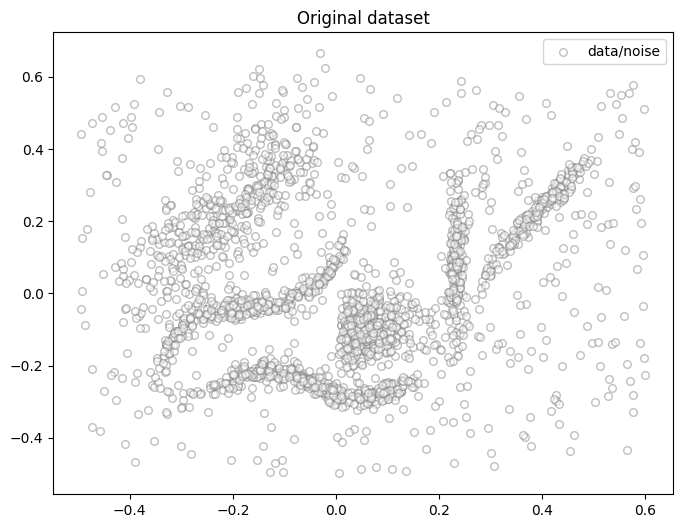

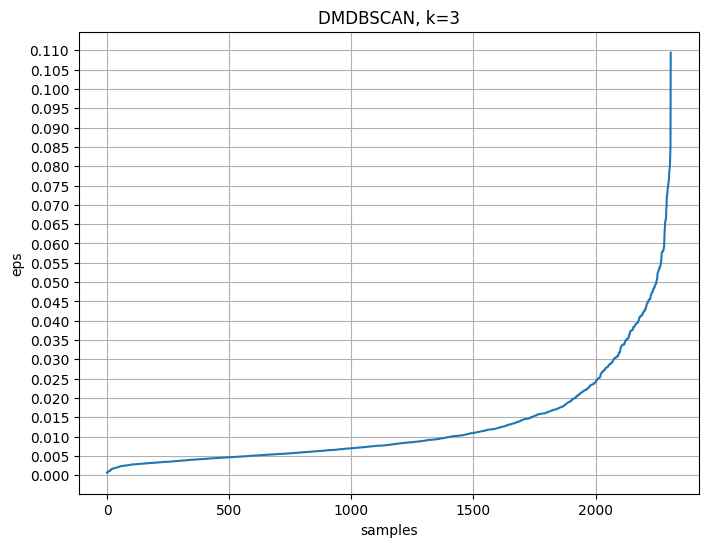

In [6]:
data = np.load(r'clusterable_data.npy')
# plot
plot_it(data,[1],"Original dataset")
# dmdbscan
dmdbscan(data,k=3)

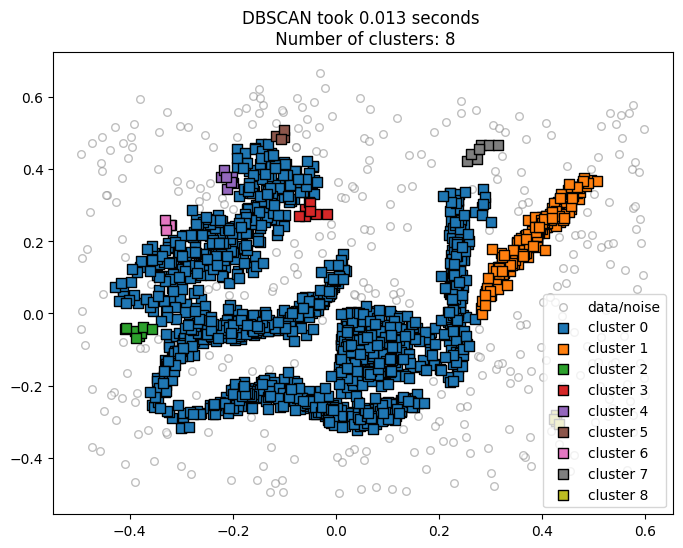

In [7]:
# run clustering
start_time = time.time()
model = cluster.DBSCAN(eps=0.025, min_samples=4)
labels = model.fit_predict(data)
end_time = time.time()
# plot
plot_it(data,labels,f'DBSCAN took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}')

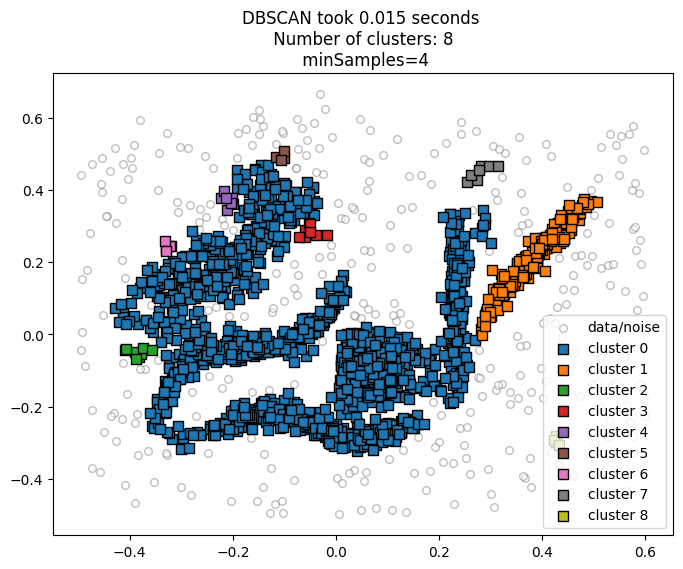

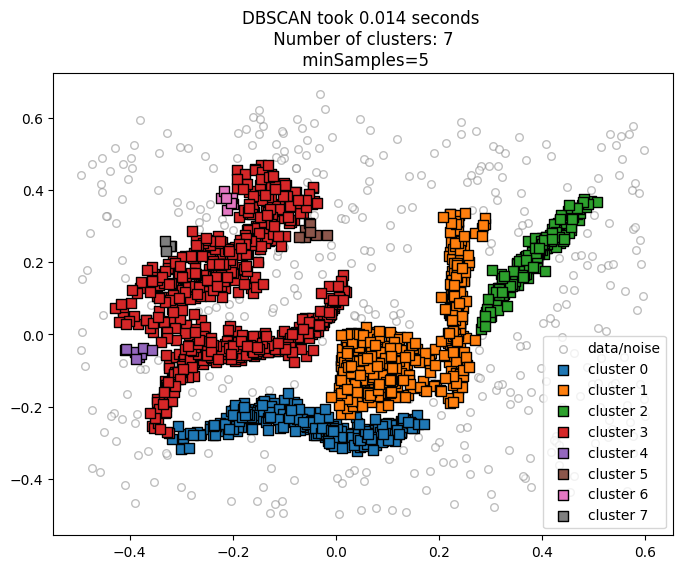

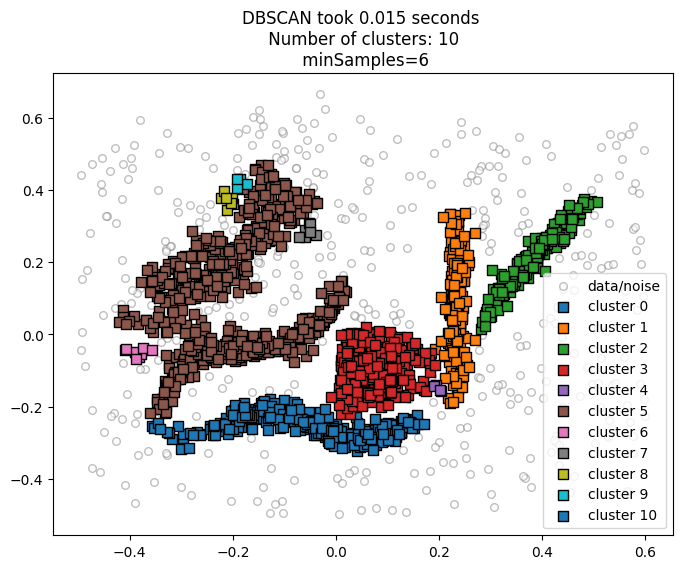

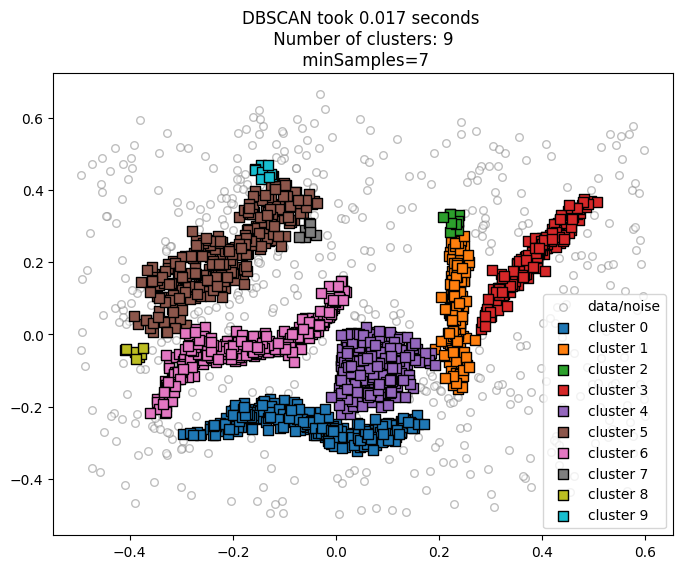

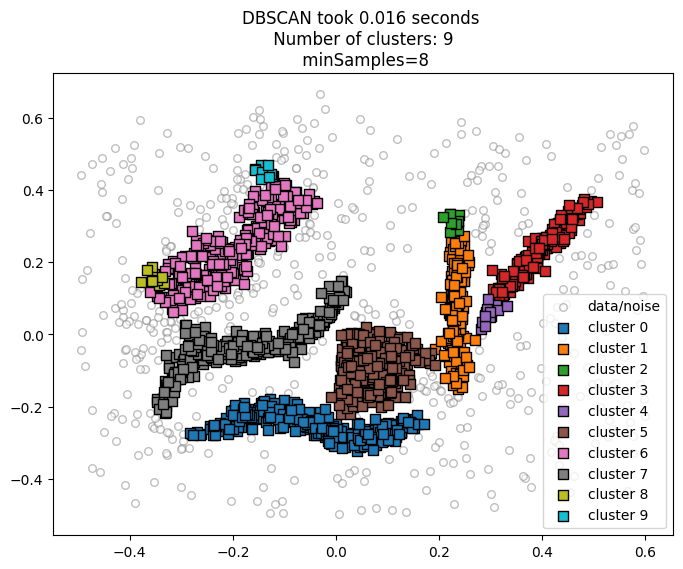

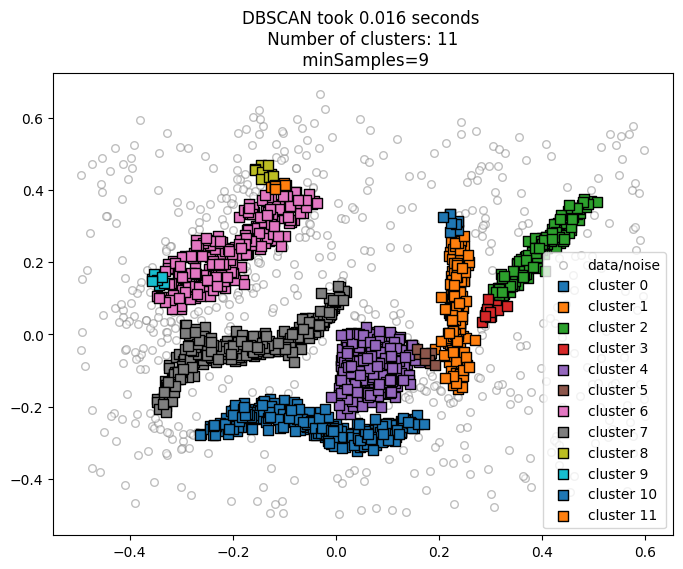

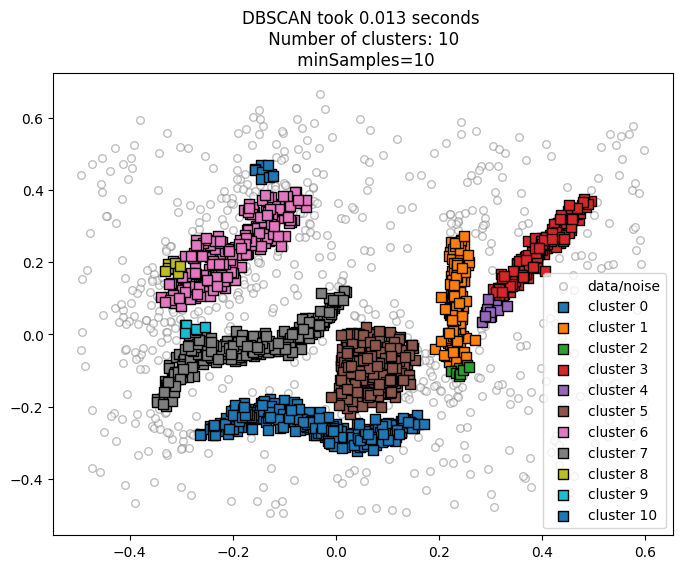

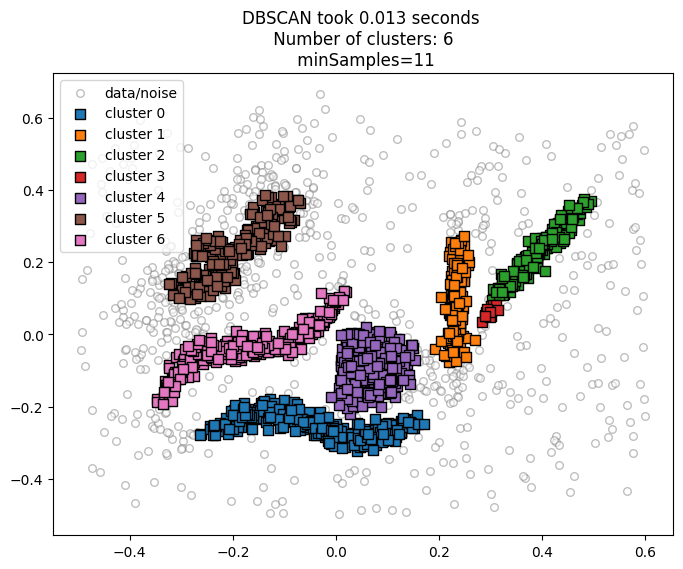

In [8]:
for ms in range(4,12):
    # run clustering
    start_time = time.time()
    labels = cluster.DBSCAN(eps=0.025, min_samples=ms).fit_predict(data)
    end_time = time.time()
    # plot
    plot_it(data,labels,f'DBSCAN took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)} \n minSamples={ms}')

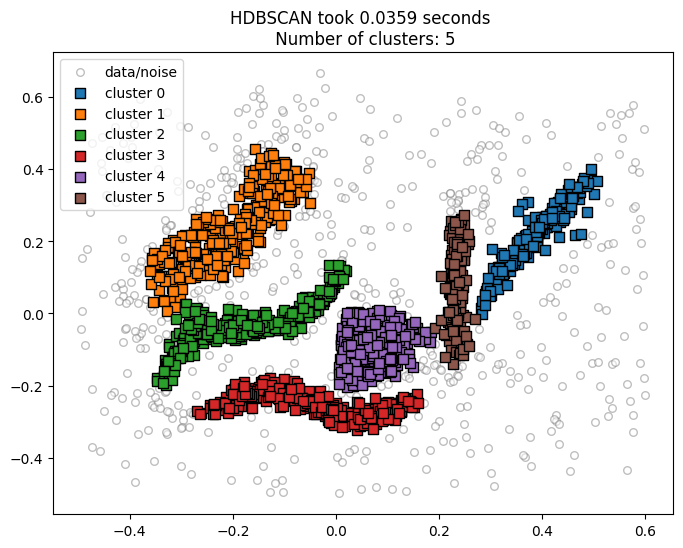

In [9]:
# run clustering
start_time = time.time()
labels = hdbscan.HDBSCAN(min_cluster_size=13).fit_predict(data)
end_time = time.time()

# plot
plot_it(data,labels,f'HDBSCAN took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}')

Initialization complete
Iteration 0, inertia 95.52829333578522
Iteration 1, inertia 62.01070729093373
Iteration 2, inertia 54.797451603894416
Iteration 3, inertia 47.478587172700074
Iteration 4, inertia 45.3846344092437
Iteration 5, inertia 44.48680759749656
Iteration 6, inertia 43.87766285164108
Iteration 7, inertia 43.52305729095455
Iteration 8, inertia 43.29964070419972
Iteration 9, inertia 43.204395926216336


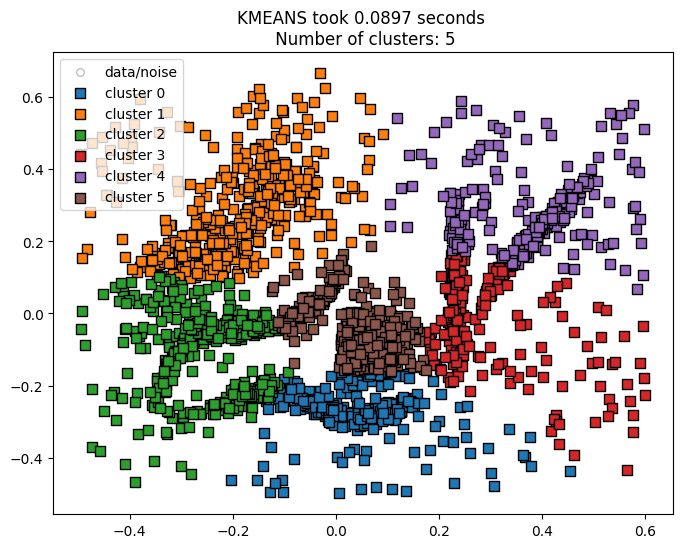

In [10]:
from sklearn.cluster import KMeans

# run clustering
start_time = time.time()

k = 6  # number of clusters
kmeans = KMeans(
    n_clusters=k,  # set the number of clusters
    init='random',  # initial position of cluster centers
    n_init=1,  # number of k-Means runs with different initial centers
    max_iter=10,  # maximum number of iterations within a single run
    tol=1e-04,  # tolerance (metrics) for convergence
    verbose=2,  # output verbosity level (2 ... output inertia)
    random_state=2,  # reproduction parameters
)

labels = kmeans.fit_predict(data)
end_time = time.time()



# plot
plot_it(data,labels,f'KMEANS took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}')

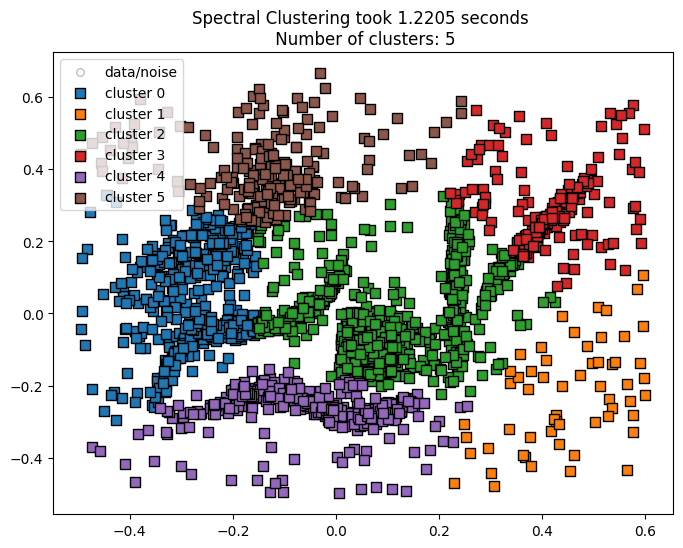

In [14]:
from sklearn.cluster import KMeans, SpectralClustering

# run clustering
start_time = time.time()

clustering = SpectralClustering(n_clusters=6)
labels = clustering.fit_predict(data)
end_time = time.time()



# plot
plot_it(data,labels,f'Spectral Clustering took {round(end_time - start_time,4)} seconds \n Number of clusters: {max(labels)}')